In [1]:
from langchain.agents import create_pandas_dataframe_agent

In [2]:
import os

os.environ['OPENAI_API_KEY'] = 'sk-*****************************************'

In [7]:
from langchain.llms import OpenAI
import pandas as pd

df = pd.read_csv('IRIS.csv')

In [8]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [9]:
agent.run("How many rows and columns are there in the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to find out the shape of the dataframe
Action: python_repl_ast
Action Input: df.shape
Observation: (150, 5)
Thought: I now know the final answer
Final Answer: There are 150 rows and 5 columns in the dataset.

> Finished chain.


'There are 150 rows and 5 columns in the dataset.'

In [10]:
agent.run("What are the names of all the columns?")



> Entering new AgentExecutor chain...
Thought: I need to find out the names of the columns
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Thought: I now know the final answer
Final Answer: sepal_length, sepal_width, petal_length, petal_width, species

> Finished chain.


'sepal_length, sepal_width, petal_length, petal_width, species'

In [11]:
agent.run("What is the maximum value of sepal_width for each specie?")



> Entering new AgentExecutor chain...
Thought: I need to group the data by species and then find the maximum value of sepal_width for each group.
Action: python_repl_ast
Action Input: df.groupby('species')['sepal_width'].max()
Observation: species
Iris-setosa        4.4
Iris-versicolor    3.4
Iris-virginica     3.8
Name: sepal_width, dtype: float64
Thought: I now know the final answer
Final Answer: The maximum value of sepal_width for each specie is 4.4 for Iris-setosa, 3.4 for Iris-versicolor, and 3.8 for Iris-virginica.

> Finished chain.


'The maximum value of sepal_width for each specie is 4.4 for Iris-setosa, 3.4 for Iris-versicolor, and 3.8 for Iris-virginica.'

In [12]:
agent.run("Calculate the mean and median of the petal_length column.")



> Entering new AgentExecutor chain...
Thought: I need to calculate the mean and median of the petal_length column.
Action: python_repl_ast
Action Input: df['petal_length'].mean()
Observation: 3.758666666666666
Thought: I need to calculate the median of the petal_length column.
Action: python_repl_ast
Action Input: df['petal_length'].median()
Observation: 4.35
Thought: I now know the final answer.
Final Answer: The mean of the petal_length column is 3.758666666666666 and the median is 4.35.

> Finished chain.


'The mean of the petal_length column is 3.758666666666666 and the median is 4.35.'



> Entering new AgentExecutor chain...
Thought: I need to use the python_repl_ast tool to plot the histogram.
Action: python_repl_ast
Action Input: df['petal_length'].hist()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A histogram of the petal_length column has been plotted.

> Finished chain.


'A histogram of the petal_length column has been plotted.'

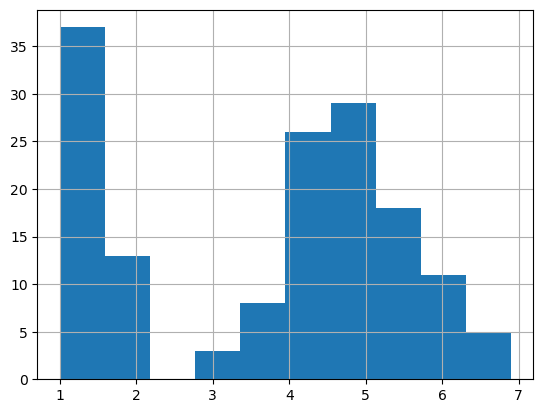

In [13]:
agent.run("Plot a histogram of the petal_length column.")



> Entering new AgentExecutor chain...
Thought: I need to use the dataframe to plot the scatter plot
Action: python_repl_ast
Action Input: df.plot.scatter(x='petal_length', y='petal_width')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A scatter plot of petal length and petal width has been plotted.

> Finished chain.


'A scatter plot of petal length and petal width has been plotted.'

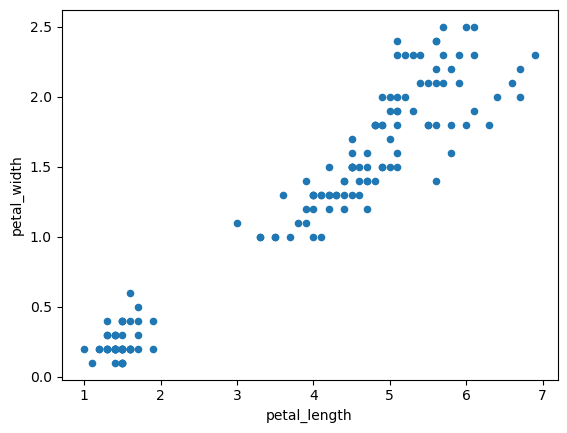

In [14]:
agent.run("Plot a scatter plot of petal length and petal width")